# Importing Libraries

In [28]:
import cv2
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import scipy.io
import copy
plt.rcParams['figure.figsize'] = [6,3]

# Importing Yale Faces Database from .mat file

In [3]:
data = scipy.io.loadmat('Yale_64x64.mat')
print(type(data))

<class 'dict'>


# Dictonary to python List

In [4]:
data_list = list(data['fea'])

# Python List to Numpy Array

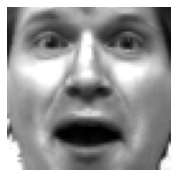

(4096, 165)


In [29]:
A = np.array(data_list).T
img = plt.imshow(A[:,1].reshape(64,64).transpose())
img.set_cmap('gray')
plt.axis('off')
plt.show()
print(A.shape)

# Calculating A-M

(4096, 165)


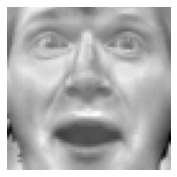

In [30]:
# Am = A
Amean = A.mean(axis=1,keepdims=True)
Am = A - Amean
print(Am.shape)
img = plt.imshow(Am[:,1].reshape(64,64).transpose())
img.set_cmap('gray')
plt.axis('off')
plt.show()

# Calculating SVD

In [7]:
U,D,Vt = np.linalg.svd(Am)
D = np.diag(D)

# In Sample Projection and Prediction

In [63]:
sample_size = 150

def InSampleProjectionAndReconstruction(image_number):
    
    j = 0

    for r in (50, 100, 200, 500, 2000, 4096):
        # Construct approximate image
        u = U[:,:r]
        # Projection
        A_train_model = np.matmul(u.T,A[:,:sample_size])

        # Reconstruction
        A_train_pred = np.matmul(u,A_train_model)
        Fimg = A_train_pred 

        plt.figure(j+1)
        j += 1
        
        plot1 = plt.subplot(121)
        img =  plt.imshow(A[:,image_number].reshape(64,64).transpose())
        img.set_cmap('gray')
        plt.title(f'Original Image (r = {r})')
        plt.axis('off')
        
        plot2 = plt.subplot(122)
        img2 = plt.imshow(Fimg[:,image_number].reshape(64,64).transpose())
        img2.set_cmap('gray')
        plt.axis('off')
        plt.title(f'Approximate Image (r = {r})')
        plt.show()  

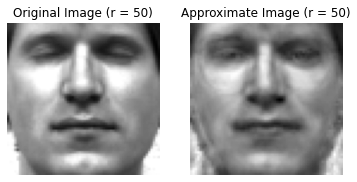

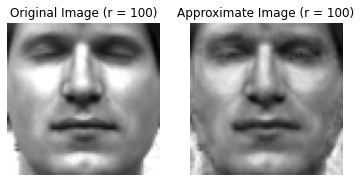

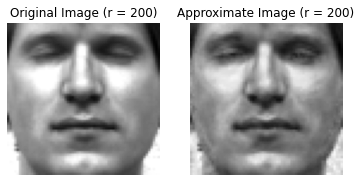

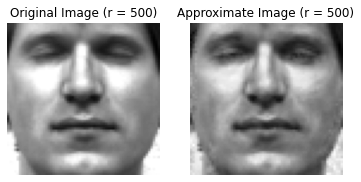

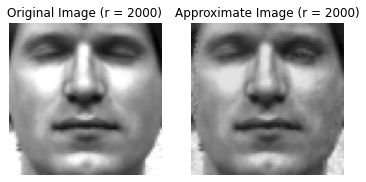

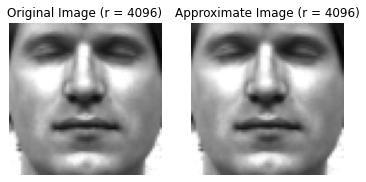

In [68]:
InSampleProjectionAndReconstruction(10)

# Out off Sample Projection and Prediction

In [65]:
def outOffSampleProjectionAndReconstruction(image_number):
    j = 0
    for r in (50, 100, 200, 500, 2000,4096):
        
        # Construct approximate image
        u = U[:,:r]
        
        # Projection
        A_test_model = np.matmul(u.T,A[:,image_number])

        # Reconstruction
        A_test_pred = np.matmul(u,A_test_model)
        Fimg = A_test_pred 

        plt.figure(j+1)
        j += 1
        
        plt.subplot(121)
        img =  plt.imshow(A[:,image_number].reshape(64,64).transpose() )
       
        img.set_cmap('gray')
        plt.axis('off')
        plt.title(f'Original Image (r = {r})')  
        
        plt.subplot(122)
        img2 = plt.imshow(Fimg.reshape(64,64).transpose())
        img2.set_cmap('gray')
        plt.axis('off')
        plt.title(f'Approximate Image (r = {r})')
        plt.show()

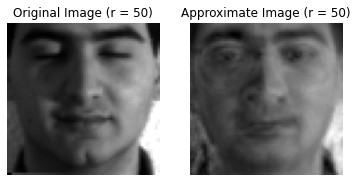

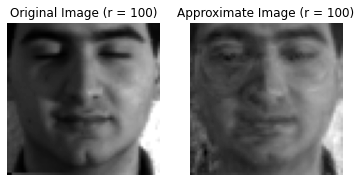

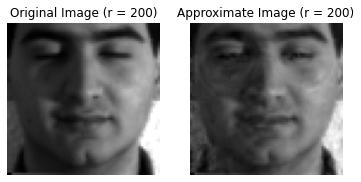

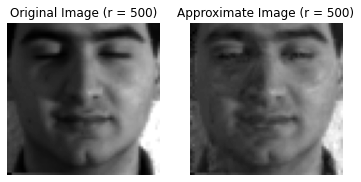

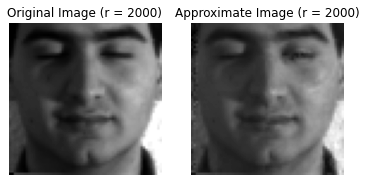

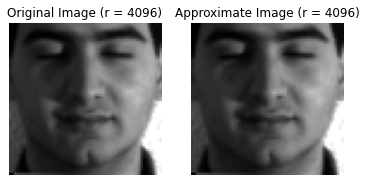

In [69]:
outOffSampleProjectionAndReconstruction(162)

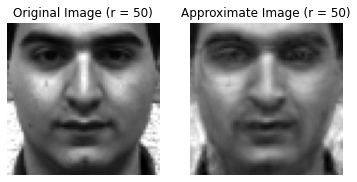

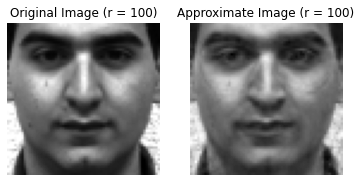

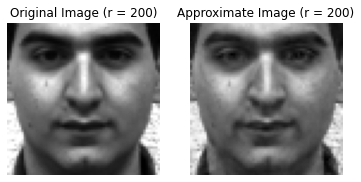

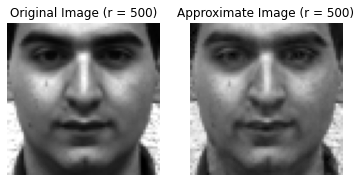

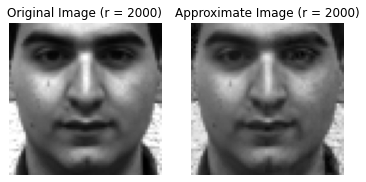

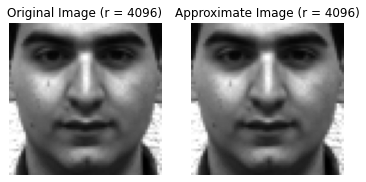

In [67]:
outOffSampleProjectionAndReconstruction(160)